In [191]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

In [192]:
df = pd.read_csv('../주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20200430.csv', encoding='cp949')

In [193]:
# shape
df.shape

(4675, 5)

In [194]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4675 non-null   object
 1   규모구분     4675 non-null   object
 2   연도       4675 non-null   int64 
 3   월        4675 non-null   int64 
 4   분양가격(㎡)  4355 non-null   object
dtypes: int64(2), object(3)
memory usage: 182.7+ KB


In [195]:
# head() 상단에 5개 row데이터추출
df.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [196]:
df.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [197]:
#tail 하단있는 row데이터 추출
df.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4670,제주,전체,2020,4,4085
4671,제주,전용면적 60㎡이하,2020,4,4039
4672,제주,전용면적 60㎡초과 85㎡이하,2020,4,4091
4673,제주,전용면적 85㎡초과 102㎡이하,2020,4,NaN
4674,제주,전용면적 102㎡초과,2020,4,NaN


In [198]:
df.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    320
dtype: int64

In [199]:
df.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [200]:
df['평당가격'] = pd.to_numeric(df['분양가격(㎡)'], errors='coerce') * 3.3
df.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당가격
0,서울,전체,2015,10,5841,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,19400.7


In [201]:
df['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [202]:
df['전용면적'] = df['규모구분'].str.replace("전용면적", "")
df['전용면적'] = df['전용면적'].str.replace("초과", "~")
df['전용면적'] = df['전용면적'].str.replace("이하", "")
df['전용면적'] = df['전용면적'].str.replace(" ", "").str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4675 non-null   object 
 1   규모구분     4675 non-null   object 
 2   연도       4675 non-null   int64  
 3   월        4675 non-null   int64  
 4   분양가격(㎡)  4355 non-null   object 
 5   평당가격     4254 non-null   float64
 6   전용면적     4675 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 255.8+ KB


In [203]:
#df.drop(columns=['규모구분'])
df = df.drop(['규모구분'], axis=1)

In [207]:
df.head(10)

,지역명,연도,월,분양가격(㎡),평당가격,전용면적
0,서울,2015,10,5841,19275.3,전체
1,서울,2015,10,5652,18651.6,60㎡
2,서울,2015,10,5882,19410.6,60㎡~85㎡
3,서울,2015,10,5721,18879.3,85㎡~102㎡
4,서울,2015,10,5879,19400.7,102㎡~
5,인천,2015,10,3163,10437.9,전체
6,인천,2015,10,3488,11510.4,60㎡
7,인천,2015,10,3119,10292.7,60㎡~85㎡
8,인천,2015,10,3545,11698.5,85㎡~102㎡
9,인천,2015,10,3408,11246.4,102㎡~


In [214]:
df.groupby(['지역명','전용면적'])['평당가격'].mean().unstack().T.round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8668.0,14940.0,10358.0,9196.0,11352.0,13368.0,14875.0,13286.0,23924.0,10269.0,9974.0,14511.0,8384.0,8245.0,10604.0,8739.0,8235.0
60㎡,7634.0,13471.0,8731.0,7938.0,9718.0,12163.0,9373.0,11434.0,23539.0,9324.0,9446.0,11392.0,7314.0,7670.0,13956.0,7916.0,7163.0
60㎡~85㎡,7542.0,12675.0,8729.0,8126.0,10120.0,12001.0,9841.0,11947.0,23087.0,9856.0,10482.0,11560.0,7351.0,7337.0,10811.0,7887.0,7305.0
85㎡~102㎡,8851.0,14014.0,10069.0,8774.0,9296.0,11337.0,9037.0,12254.0,27336.0,9946.0,8861.0,11641.0,7989.0,8356.0,10709.0,9251.0,8414.0
전체,7542.0,12732.0,8766.0,8143.0,10109.0,11994.0,9918.0,12009.0,22898.0,9896.0,10482.0,11438.0,7365.0,7358.0,10961.0,7878.0,7265.0


In [227]:
g = df.groupby(['지역명','연도'])['평당가격'].mean().unstack().round()
g.describe()

연도,2015,2016,2017,2018,2019,2020
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,9145.882353,9648.294118,10368.705882,10901.941176,12061.764706,12583.058824
std,3178.427655,3454.262290,3500.612174,3698.828758,4769.210974,5338.094586
min,6799.000000,6907.000000,7274.000000,7930.000000,7971.000000,8193.000000
25%,7464.000000,7753.000000,8198.000000,8219.000000,8934.000000,9200.000000
50%,8191.000000,8911.000000,9614.000000,10234.000000,11299.000000,11793.000000
75%,9368.000000,10282.000000,11641.000000,11936.000000,13250.000000,13425.000000
max,20316.000000,21753.000000,21831.000000,23202.000000,28287.000000,31119.000000


<AxesSubplot:xlabel='지역명'>

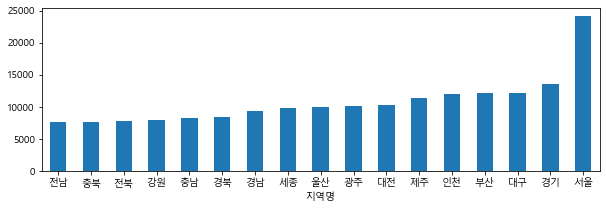

In [242]:
g1 = df.groupby(['지역명'])['평당가격'].mean().sort_values(ascending=True)
g1.plot.bar(rot=0, figsize=(10,3))

<AxesSubplot:xlabel='연도'>

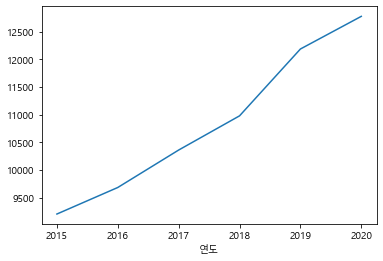

In [243]:
g2 = df.groupby(['연도'])['평당가격'].mean()
g2.plot()

<AxesSubplot:>

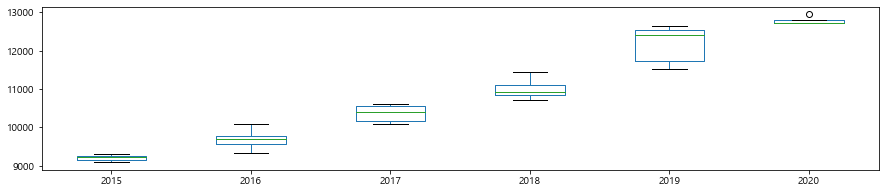

In [269]:
g3= df.groupby(['연도','월'])['평당가격'].mean().unstack().T
g3.plot.box(figsize=(15,5))